# Notebook to reproduce outputs from La Cecilia 2023

This is a notebook to reproduce outputs from  [La Cecilia and Camporese (2022)](https://onlinelibrary.wiley.com/doi/10.1002/hyp.14768) 

```{important}
# Cite this work
We believe in a community-driven approach of open-source tools that are
composable and extensible. If you use this notebook cite the work as:
> La Cecilia, D., and M. Camporese. 2022. Resolving streamflow diel fluctuations in a small agricultural catchment with an integrated surface‐subsurface hydrological model. Hydrological Processes 36(12). doi: 10.1002/hyp.14768.
```

The notebooks describes: 

1. **Preprocessing step**: how to build a mesh with different vegetation land cover and a soil including tile drains.
   - Changing **Feddes parameters**
   - Changing **Soil parameters**

2. **Simulation** (very long not recommanded to execute): solve the surface-subsurface flow during a year considering different scenarios.


3. **Plot outputs**: analysis of the results
   - spatial distribution of **actual ET**
   - spatial distribution of **groundwater level depth**


```{admonition} What you should already know
In order to complete this tutorial, you should be relatively familiar with using the pyCATHY for:
- Building a mesh from a DEM (See {doc}`../content/SSHydro/index` for more information.)
- Updating soil inputs
- ...
```


```{warning}
Found a bug 🐛/ a typo ? [Email me](mailto:benjamin.mary@unipd.it)
```

We start by importing the required packages: 
- `matplotlib` in order to plot the data;
- `cathy_tools` is the main object controlling the simulation;
- `pyCATHY.importers` allows you to read CATHY input files;
- `pyCATHY.importers` allows you to read CATHY output files;
- `pyCATHY.plotters` is a set of functions in order to plot simulation outputs.

In [1]:
import os
import matplotlib.pyplot as plt
from pyCATHY import cathy_tools
from pyCATHY.importers import cathy_inputs as in_CT
from pyCATHY.importers import cathy_outputs as out_CT
from pyCATHY.plotters import cathy_plots as cplt

In [2]:
#%% Init CATHY model
# ------------------------
path2prj = '.'  # add your local path here
simu = cathy_tools.CATHY(dirName=path2prj, prj_name="LaCecilia_2022_HP")

cathy_tools

🏁 Initiate CATHY object

<module 'pyCATHY.cathy_tools' from '/home/ben/Documents/GitHub/BenjMy/pycathy_wrapper/pyCATHY/cathy_tools.py'>

## 1. Preprocessing step

Starting from DEM data (dtm_13.val) and parameters file (hap.in), the preprocessing produce a complete set of files describing physiographic features of a drainage system. Such files represent the input files for CATHY simulations.


### Building the mesh

The **DEM** should be accurate enough to account for an explicit representation of tile trains (diameter between 10 and 60 cm) 
- spatial resolution of 20x20 m necessary

```{tip}
Outside the region of interest the elevation are set to -9999
```


🔄 Update hap.in file

🔄 update dem_parameters file 

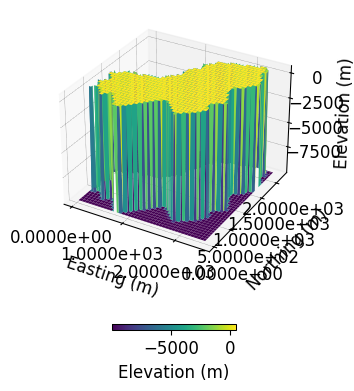

In [3]:
simu.show_input(prop="dem")

### Root map properties 

The **`veg_mag`** is a raster file that defined the position of the vegetation.

```{tip}
Outside the region of interest the elevation are set to -9999
```


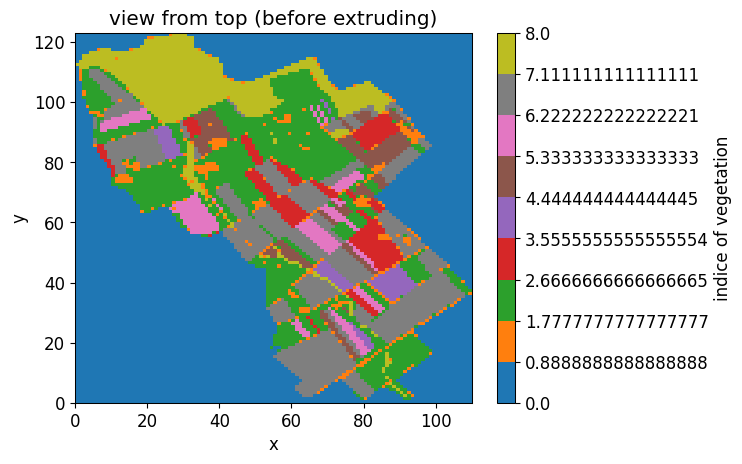

In [4]:
fig, ax = plt.subplots(1)
simu.show_input(prop="root_map", ax=ax,
               linewidth=0)


#### Scenario with varying atmbc and Feddes parameters

1. **Scenario 1**, by excluding irrigation from the reference simulation. This scenario serves primarily to assess the differences between an agricultural catchment and a natural one.

```python
simu.update_atmbc()
```

2. In **Scenario 2**, we additionally **excluded the effect of oxygen stress**, whereby roots could take up water even when soil moisture exceeded a threshold according to the Feddes approach

```python
simu.update_soil(FP=new_feddes_parameters)
```

3. We considered two test cases in **Scenario 3**. Starting from Scenario 2, we assumed a **homogeneous rooting depth** of 0.3 m in the first case and of 2.0 m in the second one.

```python
simu.update_soil(FP=new_feddes_parameters)
```



#### Soil parameters


| Depth (cm) | Porosity | Residual moisture content | Van Genuchten / (cm^-1) | Van Genuchten n | Specific storage coefficient (m^-1) | Saturated hydraulic conductivity (m/s) |
| --- | --- | --- | --- | --- | --- | --- |
| 0-80 | 0.43 | 0.078 | 0.036 | 1.56 | 1.00 x 10^-3 | 7.3 x 10^-5 |
| 80-140 (Tile-drain) | 0.43 | 0.078 | 0.036 | 1.56 | 1.00 x 10^-3 | 1.0 x 10^-3 | 
| 140–500 | 0.43 | 0.078 | 0.036 | 1.56 | 1.00 x 10^-3 | 7.3 x 10^-5 |


In [5]:
simu.update_veg_map()

df_soil, _ = simu.read_inputs('soil')
#simu.update_soil()
#simu.soil

df_soil

df_soil['PERMX']



─────────────────────────────────────────── ⚠ warning messages above ⚠ ────────────────────────────────────────────

                            The parm dictionnary is empty
                            Falling back to defaults to update CATHYH
                            This can have consequences !!
                            

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────

🔄 update parm file 

str  zone
0    0       0.0001
1    0       0.0001
2    0       0.0001
3    0       0.0001
4    0       0.0001
5    0       0.0001
6    0       0.0001
7    0       0.0001
8    0       0.0001
9    0       0.0001
Name: PERMX, dtype: float64

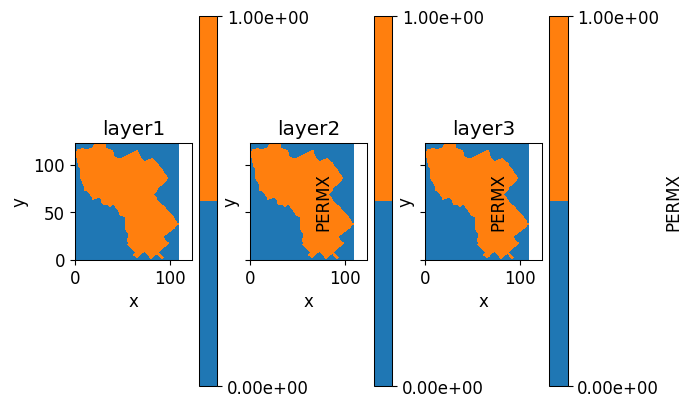

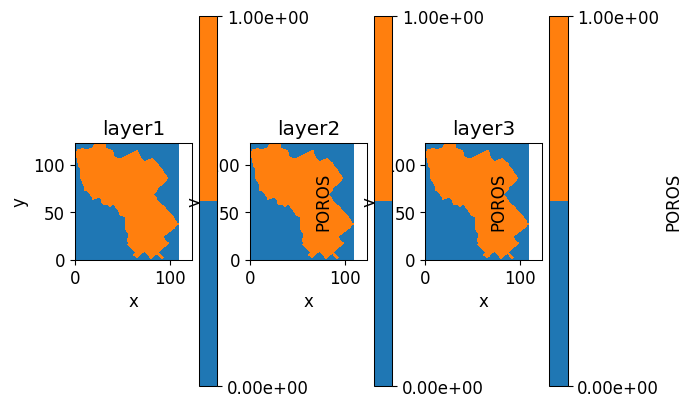

In [17]:

fig, axs = plt.subplots(1,3, sharex=True, sharey=True)
axs= axs.ravel()
for i, ax in enumerate(axs):
    simu.show_input(
                    prop="soil", 
                    yprop="PERMX", 
                    layer_nb=i,
                    ax = ax,
                    linewidth=0,
                   )
    ax.axis('square')
    ax.set_title('layer'+ str(i+1))


fig, axs = plt.subplots(1,3)
for i, ax in enumerate(axs):
    simu.show_input(
                    prop="soil", 
                    yprop="POROS", 
                    layer_nb=i,
                    ax = ax,
                    linewidth=0,

                   )
    ax.axis('square')
    ax.set_title('layer'+ str(i+1))


## 2. Run simulation

## 3. Plot outputs

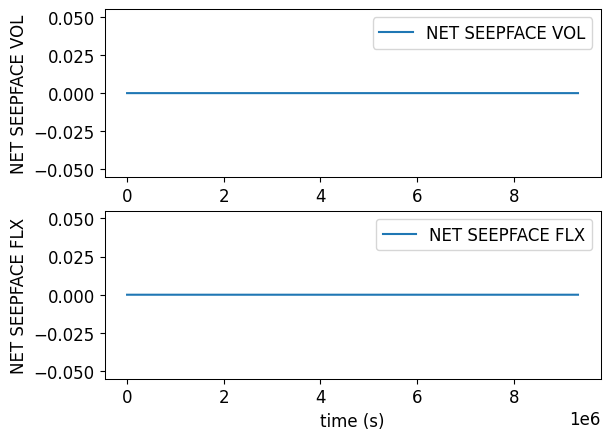

In [7]:

#%% plot NET SEEPFACE VOL and NET SEEPFACE FLX over the time t
simu.show(prop="hgsfdet")

/home/ben/Documents/GitHub/BenjMy/pycathy_wrapper/pyCATHY/importers/cathy_outputs.py:330: UserWarning: Input line 3 contained no data and will not be counted towards `max_rows=14998`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  dtcoupling = np.loadtxt(dtcoupling_file, skiprows=2, max_rows=2 + nstep)


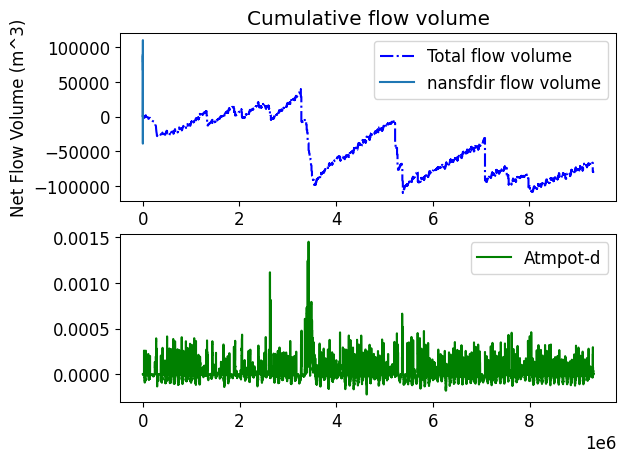

In [8]:
fig, axs = plt.subplots(2,1)

#%% plot Atmact-vf = f (time)
simu.show(prop="dtcoupling", yprop="Atmpot-d", ax=axs[0])

#%% Plot the "Total flow volume" and the "nansfdir flow volume" = f(time)
simu.show(prop="cumflowvol", ax=axs[0])




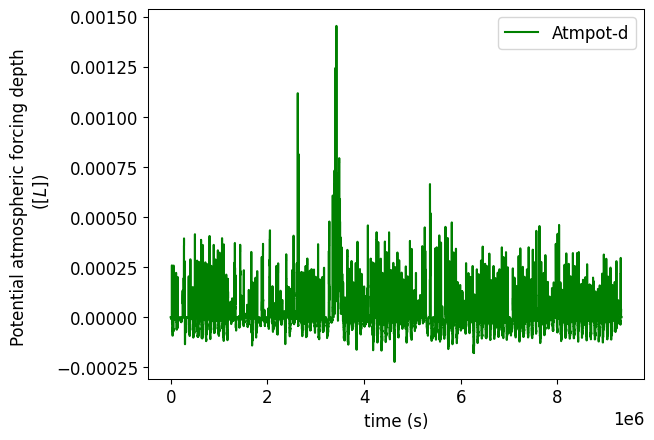

In [9]:
simu.show(prop="dtcoupling", yprop="Atmpot-d")

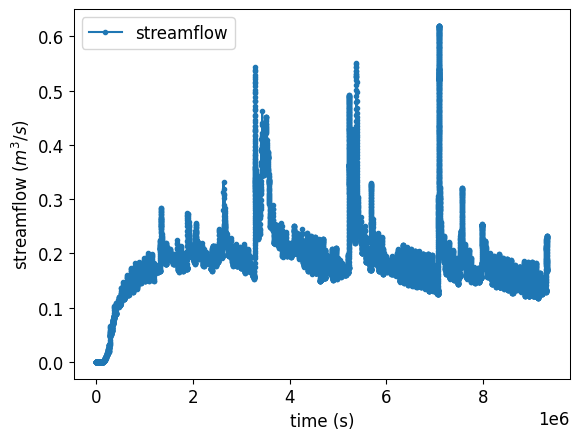

In [10]:
#%% Another interesting graph looking at the **streamflow = f(time)**
simu.show(prop="hgraph")

no file specified

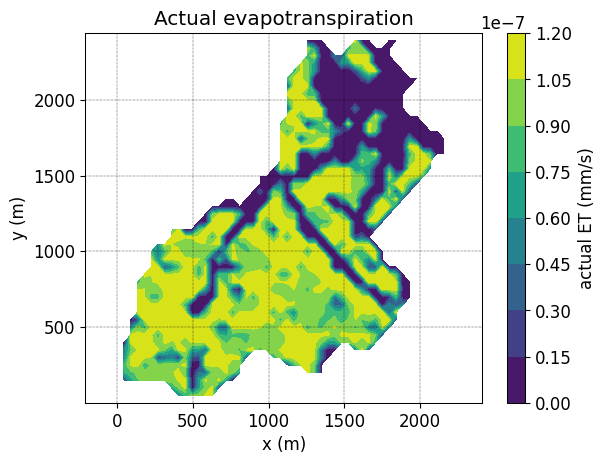

In [11]:
fig, ax = plt.subplots(1)
simu.show('spatialET',ax=ax, ti=10)

In [ ]:
fig, ax = plt.subplots(1,2)
simu.show('WTD',ax=ax, ti=1)
simu.show('WTD',ax=ax, ti=10)

In [13]:
import ipywidgets as widgets